# All State Insurance Claim Prediction
                                                                                    Code Written By : Dasari Mohan
                                                                                    


## Objective: 
We will predict how severe insurance claims will be for All State. We accomplish this using ensemble machine learning algorithms.


## Description:

All State, a personal insurance company in the United States, is interested in leveraging data science to predict the severity and the cost of insurance claims post an unforeseen event.

### The notebook is intended to cover the following concepts

<ul>
<li>Business problem</li>
<li>Dataset overview</li>
<li>Exploratory data analysis</li>
<li>Data cleaning and Pre-Processing</li>
<li>Outlier treatment</li>
<li>Feature selection techniques</li>
<li>Machine learning models</li>
<li>Hyperparameter tuning</li>
<li>Model validation</li>
<li>Deployment using Flask API</li>
</ul>

##### Import the packages and load the training data

In [93]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

# modify the display options to view entire dataframe
pd.options.display.max_columns = None

In [94]:
train_data = pd.read_csv("train.csv")

train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [95]:
train_data.shape

(188318, 132)

In [96]:
column_names = np.array(train_data.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

#### Identify the categorical and numerical columns to check the data distribution and 5 point summary

In [97]:
column_datatypes = train_data.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
continuous_columns = list(column_datatypes[column_datatypes=="float64"].index.values)
continuous_columns.remove('loss')

#### Check the distribution of categorical variables

In [98]:
# Function to check the distribution of values in categorical columns
#Training data and Categorical columns list

def category_distribution(train_data,categorical_columns):
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train_data[cat_column].value_counts())
    return(categorical_column_distribution)

categorical_column_distribution = category_distribution(train_data,categorical_columns)
categorical_column_distribution[0:10]

[A    141550
 B     46768
 Name: cat1, dtype: int64,
 A    106721
 B     81597
 Name: cat2, dtype: int64,
 A    177993
 B     10325
 Name: cat3, dtype: int64,
 A    128395
 B     59923
 Name: cat4, dtype: int64,
 A    123737
 B     64581
 Name: cat5, dtype: int64,
 A    131693
 B     56625
 Name: cat6, dtype: int64,
 A    183744
 B      4574
 Name: cat7, dtype: int64,
 A    177274
 B     11044
 Name: cat8, dtype: int64,
 A    113122
 B     75196
 Name: cat9, dtype: int64,
 A    160213
 B     28105
 Name: cat10, dtype: int64]

In [99]:
length_categorical_columns = list(map(lambda x:len(x), categorical_column_distribution))
length_categorical_columns[0:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [100]:
# Count the number of columns having the same number of unique values

distribution_dict = dict()
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val] = 1
        
distribution_dict

{2: 72,
 3: 4,
 4: 12,
 8: 3,
 7: 4,
 5: 3,
 16: 2,
 15: 1,
 19: 2,
 9: 1,
 13: 1,
 17: 2,
 20: 2,
 11: 1,
 84: 1,
 131: 1,
 51: 1,
 61: 1,
 23: 1,
 326: 1}

### Plot a bar-graph

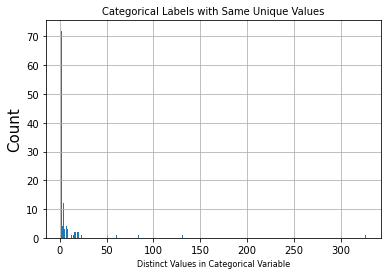

In [101]:
# Plot showing the count of columns having same number of unique values

keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values,width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=8)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values',fontsize=10)
plt.grid()
plt.show()

#### Lets Check the distribution of continuous variables

In [102]:
# filter out the continous columns and view the descriptive statistics

train_data[continuous_columns].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


## Data cleaning and Pre-processing

In [103]:
# Check if there is any missing value in the columuns
# value of 0 indicates no missing values

missing_values = train_data.isnull().sum()
np.max(missing_values)

0

In [104]:
# Manually insert a blank value across 5 rows

total_rows = train_data.shape[0]
columns_with_blanks_cat = np.random.randint(1,116,2)
columns_with_blanks_cont = np.random.randint(117,130,3)
columns_with_blank = np.append(columns_with_blanks_cat,columns_with_blanks_cont)

# For every column insert 5 blanks at random locations

for col in columns_with_blank:
    rows_with_blanks = np.random.randint(1,total_rows,5)
    train_data.iloc[rows_with_blanks,col] = np.nan

In [105]:
#Validate the number of columns with missing values

missing_values = train_data.isnull().sum()
np.max(missing_values)

5

In [106]:
# Displaying the columns with missing values

columns_with_missing = train_data.columns[train_data.isnull().any()]
print(columns_with_missing)

Index(['cat20', 'cat38', 'cont5', 'cont8', 'cont9'], dtype='object')


### Data Preprocessing class with the following functions:

missing_value_continuous: Function to handle missing values of continuous variables

missing_value_categorical: Function to handle missing values of categorical variables

outlier_treatment: Function to handle continuous outliers in the dataset


In [107]:
class Data_preprocessing:
    def __init__(self,train_data):
        self.train_data = train_data
    
    def missing_value_continuous(self,column_names_with_specific_type,imputation_type="mean"):
        
        if imputation_type == "mean":
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
            mean_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=mean_imputer.transform(self.train_data[column_names_with_specific_type])
        
        if imputation_type == "median":
            median_imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
            median_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=median_imputer.transform(self.train_data[column_names_with_specific_type])
        
        return self.train_data
    
    def missing_value_categorical(self,column_names_with_specific_type,imputation_type = "most_frequent"):
        
        most_frequent = SimpleImputer(strategy = "most_frequent")
        most_frequent.fit(self.train_data[column_names_with_specific_type])
        self.train_data[column_names_with_specific_type] = most_frequent.transform(train_data[column_names_with_specific_type])
        return self.train_data
    
    def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
        
        if action == "median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                median_outlier = np.median(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name] < (Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name] > (Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name] = median_outlier
        
        if action == "mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name] < (Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name] > (Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name] = mean_outlier
        
        if action == "remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name] < (Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name] > (Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data

In [108]:
Data_preprocessing_obj = Data_preprocessing(train_data)

# For Continuous
train_data = Data_preprocessing_obj.missing_value_continuous(continuous_columns,"median")

# For Categorical
train_data = Data_preprocessing_obj.missing_value_categorical(categorical_columns)

### Section on handling outliers in the dataset

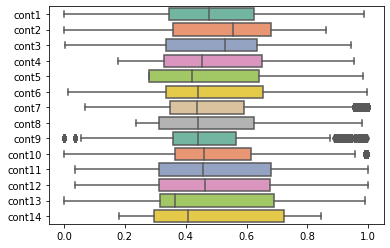

In [109]:
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

In [110]:
# Creating a list of columns with outlliers

columns_with_outlier = ['cont7','cont9','cont10']

In [111]:
# Compute the interquartile range for all continuous columns

Q1 = train_data[continuous_columns].quantile(0.25)
Q3 = train_data[continuous_columns].quantile(0.75)
IQR = (Q3-Q1)
train_data = Data_preprocessing_obj.outlier_treatment(Q1,Q3,IQR,columns_with_outlier,"median")

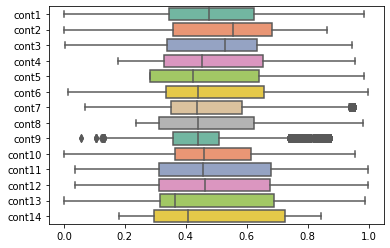

In [112]:
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

# Feature Engineering

### Feature elimination techniques for continuous and categorical features

#### Handling correlation between Numerical variables

1. Remove variables with constant variance
2. Remove variables with Quasi-Constant variance with a fixed threshold
3. Remove correlated variables

In [113]:
def feature_selection_numerical_variables(train_data, qthreshold,corr_threshold,exclude_numerical_cols_list):
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(train_data.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    # remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns])
    constant_columns = [column for column in train_data[numerical_columns].columns 
                    if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)

    # Remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
        
    # Remove variables with qconstant variance
    # Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns])
    qconstant_columns = [column for column in train_data[numerical_columns].columns 
                         if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    # Remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]
    
    # Remove correlated variables
    correlated_features = set()
    correlation_matrix = train_data[numerical_columns].corr()
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0,cmap='coolwarm',square=True,annot=True)

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train_data.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train_data,constant_columns,qconstant_columns,correlated_features    

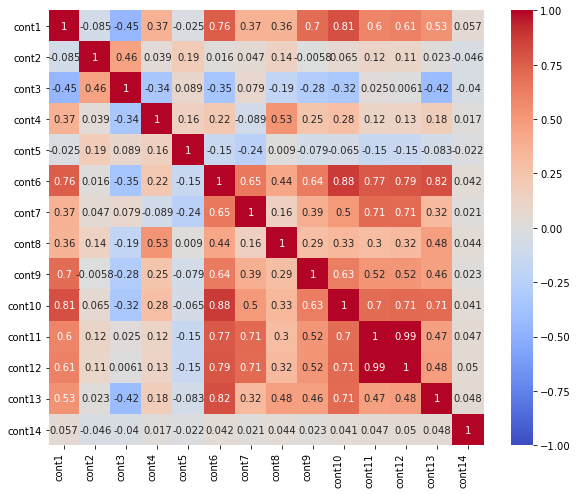

In [114]:
train_data,constant_columns,qconstant_columns,correlated_features = feature_selection_numerical_variables(train_data,0.01,0.75,['loss','id'],)

In [115]:
correlated_features

{'cont10', 'cont12', 'cont6'}

### Handling correlation between categorical variables

In [116]:
# Save the encoders to disk to be fitted on test data

for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    filename = cf1 + ".sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1] = le.transform(train_data[cf1])

In [117]:
# Calculate the unique values with a categorical columns

df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_columns:
    unique_value_count = len(train_data[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)
columns_unique_value

array([  2,   4,   3,   7,   5,   8,  20,  19,  17,  16,  51,  15,  23,
        11,  13, 131,  84,   9, 326,  61], dtype=int64)

In [118]:
# Identify the dependent/correlated categorical variables and drop them

columns_to_drop_cat = set()
correlated_columns = dict()
for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train_data[columns_compare_against],train_data[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [119]:
train_data = train_data.drop(columns_to_drop_cat,axis=1)
train_data.head()

,id,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,cat90,cat93,cat94,cat95,cat96,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat108,cat109,cat110,cat112,cat113,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14,loss
0,1,0,0,0,0,0,1,3,0,0,0,3,1,2,4,15,1,6,0,0,8,4,6,45,28,19,55,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.569745,0.822493,0.714843,2213.18
1,2,0,0,0,0,0,0,3,0,0,0,3,3,2,4,15,11,5,0,0,4,4,10,33,65,22,38,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.338312,0.611431,0.304496,1283.60
2,5,0,0,0,0,0,0,3,0,0,0,3,3,2,4,1,11,14,0,1,4,5,0,2,85,28,5,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.381398,0.195709,0.774425,3005.09
3,10,1,0,0,0,1,0,3,0,0,0,3,3,2,4,15,8,3,0,0,4,4,10,33,67,39,4,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.327915,0.605077,0.602642,939.85
4,11,0,0,0,0,0,0,3,0,0,0,3,1,3,4,12,5,9,0,0,3,4,1,66,50,50,38,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.204687,0.246011,0.432606,2763.85


In [120]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

# Output the columns_to_drop file to a csv

columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("model/columns_to_drop.csv",index=False)

### Visualizing the Output Variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

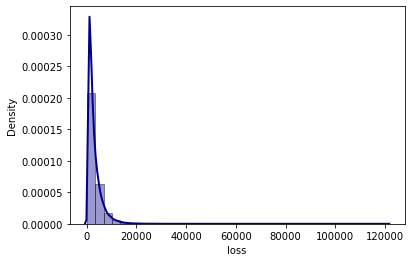

In [121]:
# Visualizing the distribution of loss value
# Density Plot and Histogram of loss

sns.distplot(train_data['loss'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})

##### We will use a log transformation on the dependent variable to reduce the scale

In [122]:
train_data['loss'] = np.log(train_data['loss'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

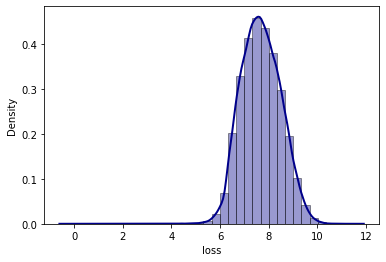

In [123]:
# Visualizing the distribution of loss value
# Density Plot and Histogram of loss

sns.distplot(train_data['loss'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

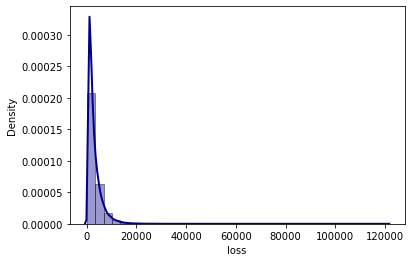

In [124]:
# Taking a anti-log to transform the variable back to its original scale
sns.distplot(np.exp(train_data['loss']), hist=True, kde=True, bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})

# Buliding  Regression Model

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [126]:
train_data.dtypes

id          int64
cat1        int32
cat15       int32
cat22       int32
cat32       int32
cat73       int32
cat75       int32
cat77       int32
cat88       int32
cat89       int32
cat90       int32
cat93       int32
cat94       int32
cat95       int32
cat96       int32
cat99       int32
cat100      int32
cat101      int32
cat102      int32
cat103      int32
cat104      int32
cat105      int32
cat108      int32
cat109      int32
cat110      int32
cat112      int32
cat113      int32
cat115      int32
cat116      int32
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont7     float64
cont8     float64
cont9     float64
cont11    float64
cont13    float64
cont14    float64
loss      float64
dtype: object

In [127]:
# Convert the int64 columns categorical
Column_datatypes = train_data.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
train_data[Integer_columns] = train_data[Integer_columns].astype('category',copy=False)
train_data.head()

,id,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,cat90,cat93,cat94,cat95,cat96,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat108,cat109,cat110,cat112,cat113,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14,loss
0,1,0,0,0,0,0,1,3,0,0,0,3,1,2,4,15,1,6,0,0,8,4,6,45,28,19,55,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.569745,0.822493,0.714843,7.702186
1,2,0,0,0,0,0,0,3,0,0,0,3,3,2,4,15,11,5,0,0,4,4,10,33,65,22,38,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.338312,0.611431,0.304496,7.157424
2,5,0,0,0,0,0,0,3,0,0,0,3,3,2,4,1,11,14,0,1,4,5,0,2,85,28,5,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.381398,0.195709,0.774425,8.008063
3,10,1,0,0,0,1,0,3,0,0,0,3,3,2,4,15,8,3,0,0,4,4,10,33,67,39,4,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.327915,0.605077,0.602642,6.845720
4,11,0,0,0,0,0,0,3,0,0,0,3,1,3,4,12,5,9,0,0,3,4,1,66,50,50,38,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.204687,0.246011,0.432606,7.924380


In [128]:
train_data.dtypes

id        category
cat1         int32
cat15        int32
cat22        int32
cat32        int32
cat73        int32
cat75        int32
cat77        int32
cat88        int32
cat89        int32
cat90        int32
cat93        int32
cat94        int32
cat95        int32
cat96        int32
cat99        int32
cat100       int32
cat101       int32
cat102       int32
cat103       int32
cat104       int32
cat105       int32
cat108       int32
cat109       int32
cat110       int32
cat112       int32
cat113       int32
cat115       int32
cat116       int32
cont1      float64
cont2      float64
cont3      float64
cont4      float64
cont5      float64
cont7      float64
cont8      float64
cont9      float64
cont11     float64
cont13     float64
cont14     float64
loss       float64
dtype: object

In [129]:
X = train_data.drop(['id','loss'],axis=1)
y = train_data['loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
# Instantiate model with 100 estimators trees
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
rf_base.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [86]:
# Save the model output
pickle.dump(rf_base, open("basemodel_rf", 'wb'))

In [137]:
# load the saved model and predict on the test data
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [138]:
# Validate the accuracy of the base model
#compare the model accuracies
Y_test_predict_base = basedmodel_rf.predict(X_test)
print("Base model - RMSE Score:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model - RMSE Score: 0.6666048514147178


In [139]:
print("Base model RMSE score:",np.sqrt(mean_squared_error(np.exp(y_test), Y_test_predict_tuned)))

Base model RMSE score: 4182.6018668951165


### HyperParameter Tuning Using RandomSearchCV

In [89]:
#number of trees
n_estimators = [100,200,300]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [200,400]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [132]:
# Use the random grid to search for best hyperparameters

rf = RandomForestRegressor()

rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,
                              n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [133]:
#check the best params
rf_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 200,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 46,
 'bootstrap': True}

In [135]:
#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model RMSE score:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned))) # Log data

Tuned model RMSE score: 0.6519620247695322


In [136]:
print("Tuned model RMSE score:",np.sqrt(mean_squared_error(np.exp(y_test), Y_test_predict_tuned))) # Normal data without Log

Tuned model RMSE score: 4182.6018668951165


# Model Loss prediction

In [160]:
test_data = pd.read_csv("test_data_subset.csv")
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [155]:
# Load the columns to drop file

columns_to_drop=pd.read_csv("model/columns_to_drop.csv")
columns_to_Retain = set(test_data.columns.values) - set(columns_to_drop.colnames.values)
test_data = test_data[columns_to_Retain]

column_datatypes = test_data.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
categorical_columns

['cat110',
 'cat22',
 'cat112',
 'cat102',
 'cat75',
 'cat101',
 'cat105',
 'cat103',
 'cat113',
 'cat115',
 'cat73',
 'cat89',
 'cat108',
 'cat94',
 'cat32',
 'cat96',
 'cat104',
 'cat90',
 'cat95',
 'cat93',
 'cat99',
 'cat15',
 'cat109',
 'cat1',
 'cat116',
 'cat88',
 'cat100',
 'cat77']

In [156]:
# Transfor the categorical columns by loading the fit encodings on training data

for cf1 in categorical_columns:
    filename = cf1 + ".sav"
    le = pickle.load(open(filename, 'rb'))
    
    #if an new classes is observed, set it to the 0 class
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    test_data[cf1]=test_data[cf1].apply(lambda x: le_dict.get(x, -1))

In [152]:
test_data_id = test_data['id']
test_data = test_data.drop('id',axis=1)
test_data.head()

,predict_loss
0,7.461754
1,7.554184
2,8.349529
3,7.753660
4,7.506204


In [153]:
Column_datatypes= test_data.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)

#convert the int64 columns categorical
test_data[Integer_columns] = test_data[Integer_columns].astype('category',copy=False)

In [145]:
# Load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

In [146]:
Y_test_predict = tunedmodel_rf.predict(test_data)
test_data['predict_loss']=Y_test_predict
test_data['id']=test_data_id
predict_data = test_data[['id','predict_loss']]

In [147]:
test_data

,id,predict_loss
0,4,7.461754
1,6,7.554184
2,9,8.349529
3,12,7.753660
4,15,7.506204


# Conclusion

1. We have clean the dataset and imputed null values with mean and mode values


2. Feature Engineeering is the most important step which involve:

    a. Handling outliers in the dataset
    
    b. Handling correlation between Numerical variables
    
    b. Handling correlation between Categorical variables
    
    d. Identify the dependent/correlated categorical variables and droped them.
    
    
3. We Built Random Forest Regressor and use the final model with best hyperparameters after using RandomSearch CV


4. With finalized model being saved as pickle file, we can use it for future predictions.